In [170]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
df= pd.read_csv("data.csv")

In [172]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [173]:
df.describe(include='all')

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,156,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
unique,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Colombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,NaN,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,NaN,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,NaN,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000


In [174]:
df.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


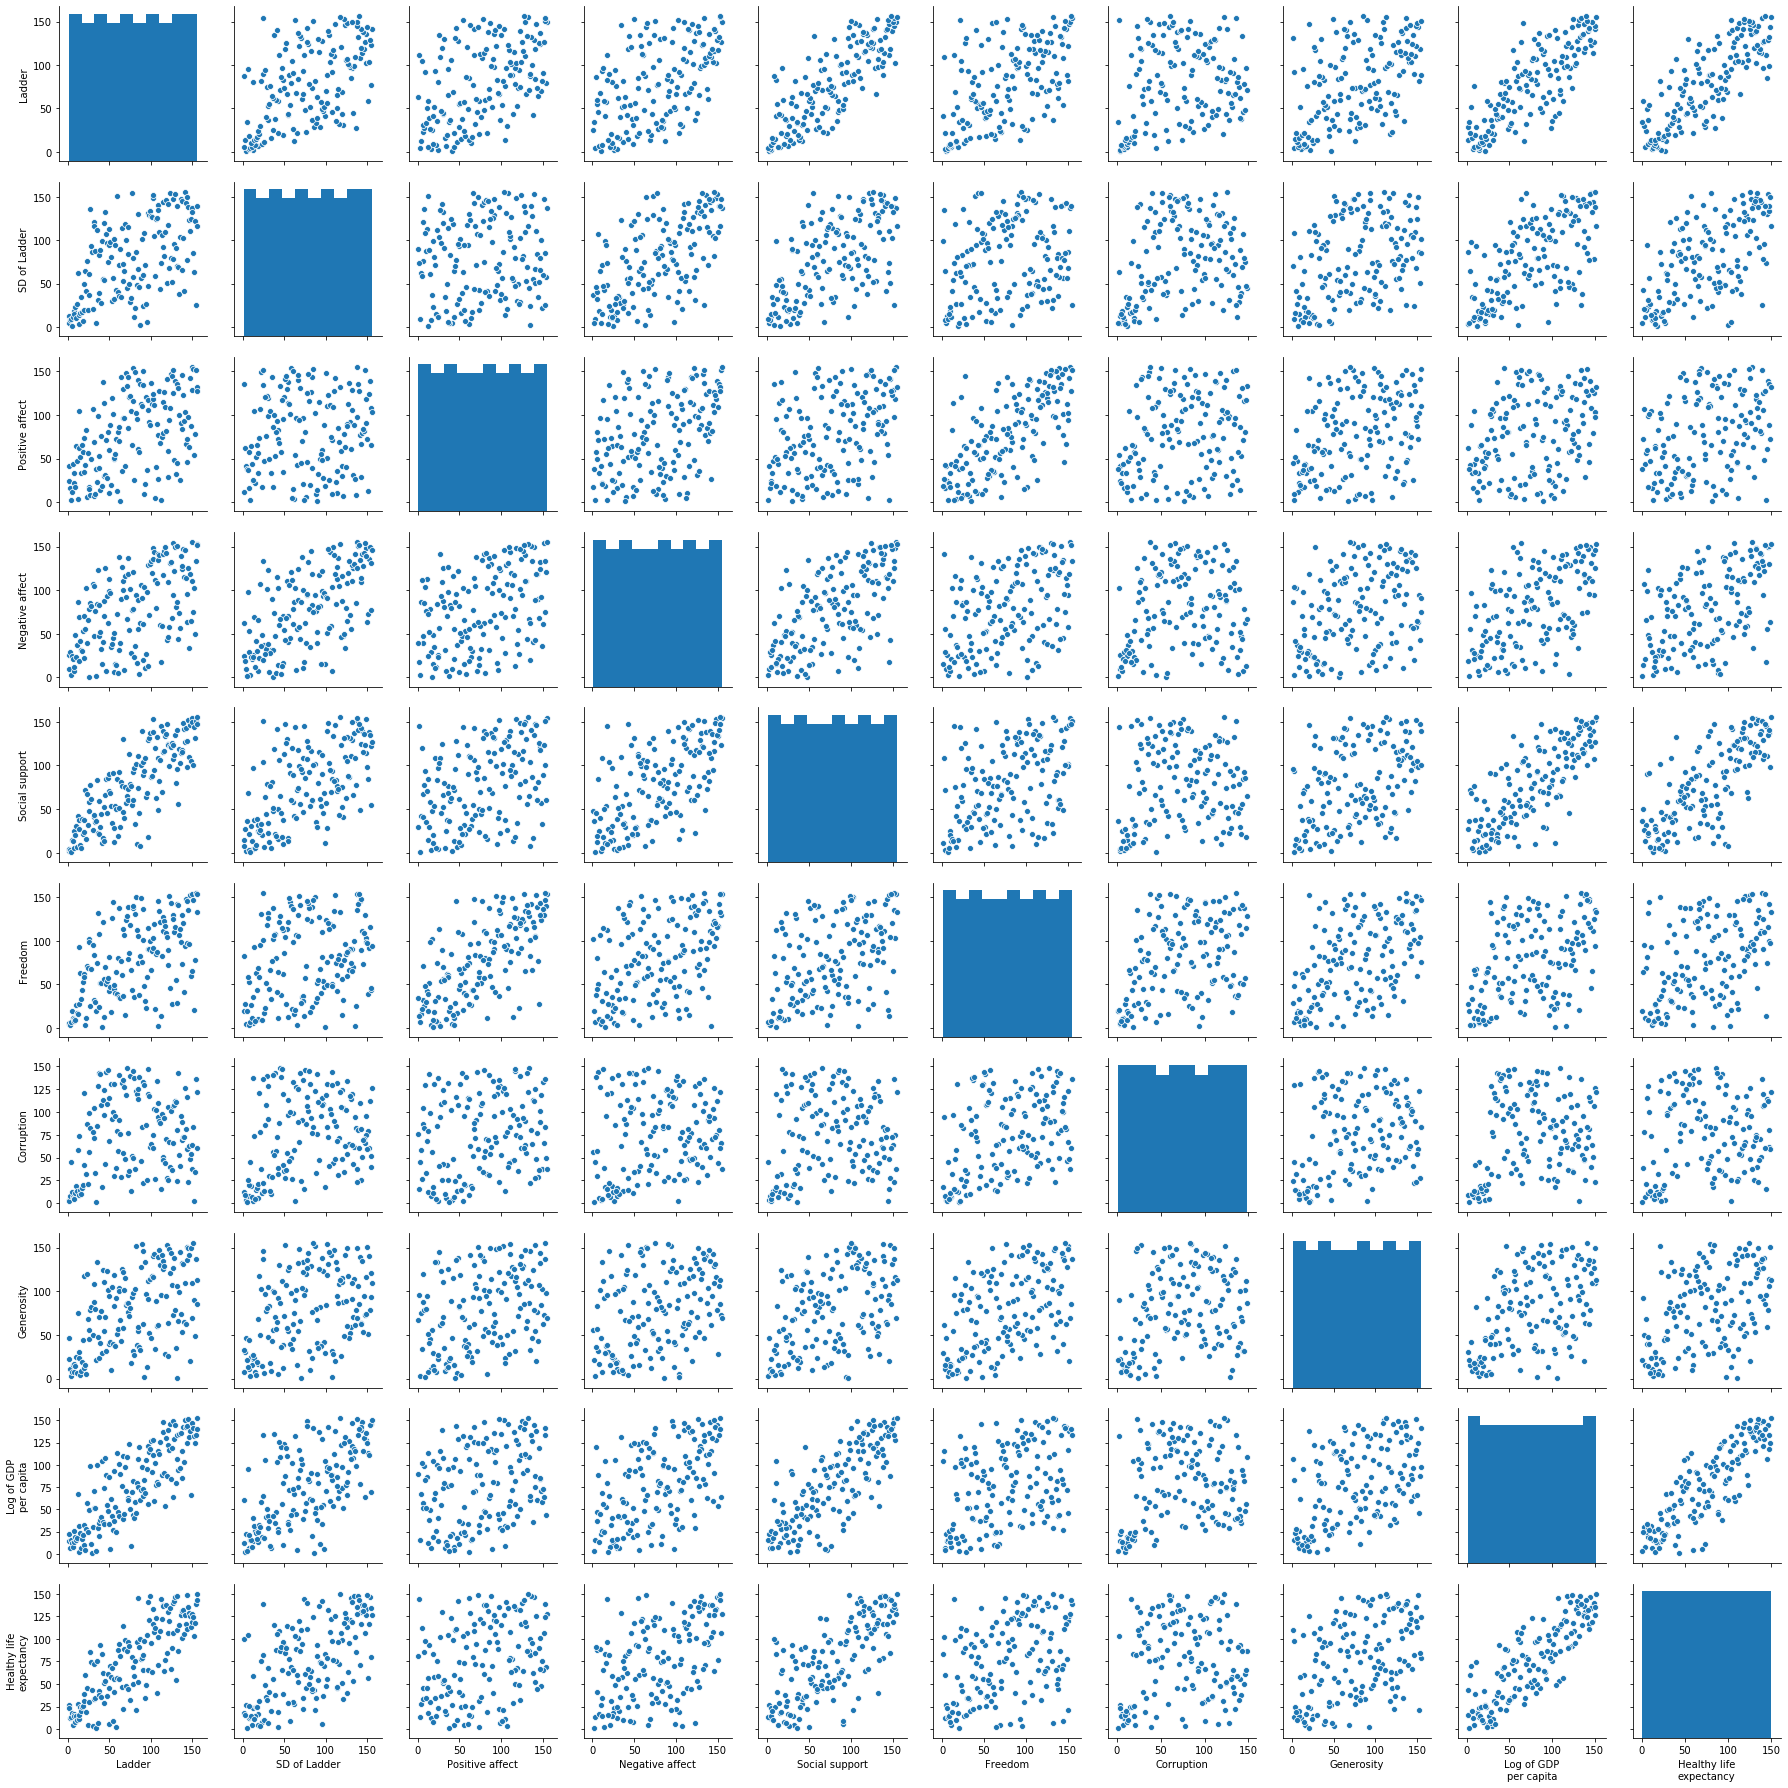

In [175]:
sns.pairplot(data=df)

In [176]:
df['Positive affect'].fillna(df['Positive affect'].mean(),inplace=True)
df['Negative affect'].fillna(df['Negative affect'].mean(),inplace=True)
df['Social support'].fillna(df['Social support'].mode(),inplace=True)
df['Freedom'].fillna(df['Freedom'].median(),inplace=True)
df['Corruption'].fillna(df['Corruption'].mean(),inplace=True)
df['Generosity'].fillna(df['Generosity'].median(),inplace=True)
df['Log of GDP\nper capita'].fillna(df['Log of GDP\nper capita'].mean(),inplace=True)
df['Healthy life\nexpectancy'].fillna(df['Healthy life\nexpectancy'].mean(),inplace=True)

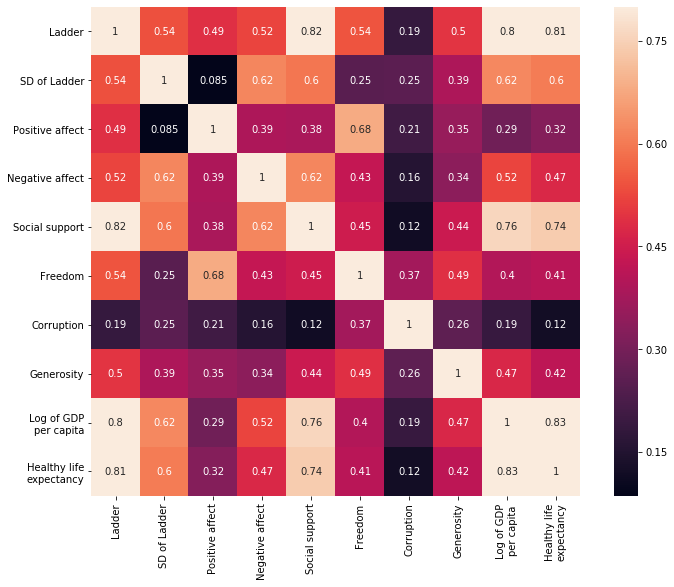

In [177]:
corrmat=df.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8, square= True,annot=True)
plt.show()

                          Healthy life\nexpectancy
Country (region)                                  
Central African Republic                     150.0
Lesotho                                      149.0
Chad                                         148.0
Ivory Coast                                  147.0
Sierra Leone                                 146.0
Nigeria                                      145.0
Somalia                                      144.0
South Sudan                                  143.0
Mali                                         142.0
Cameroon                                     141.0


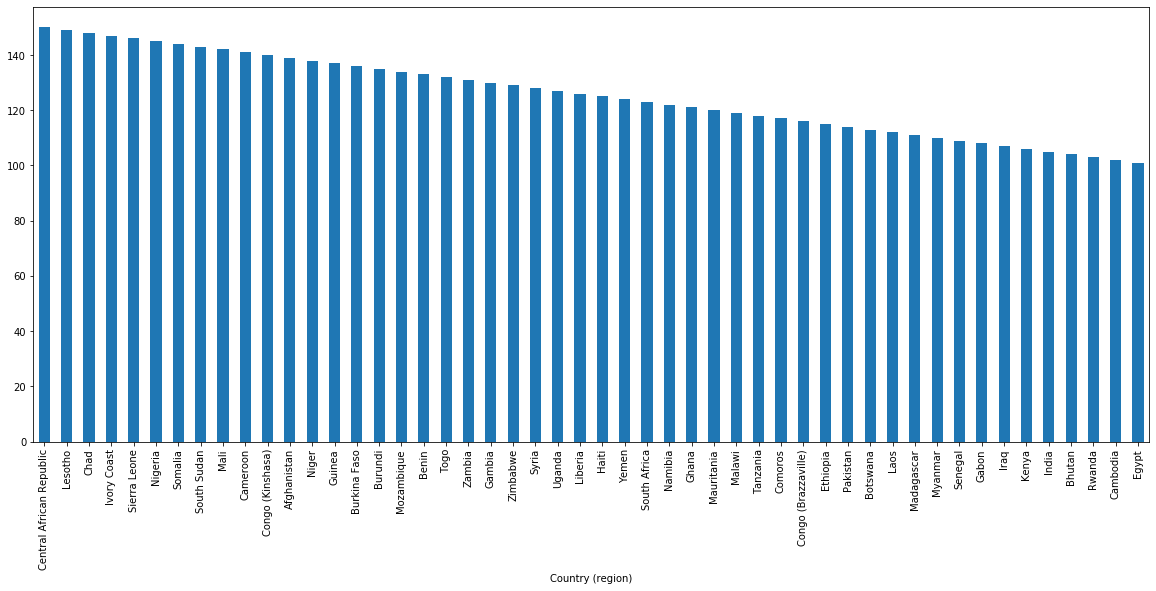

In [178]:
print(df[['Country (region)', 'Healthy life\nexpectancy']].groupby('Country (region)').mean().sort_values('Healthy life\nexpectancy', ascending=False).head(10))
country_wise = df[['Country (region)', 'Healthy life\nexpectancy']].groupby('Country (region)').mean().sort_values('Healthy life\nexpectancy', ascending=False).head(50)
country_wise.plot(kind = 'bar', legend=False,figsize=(20,8))
plt.show()

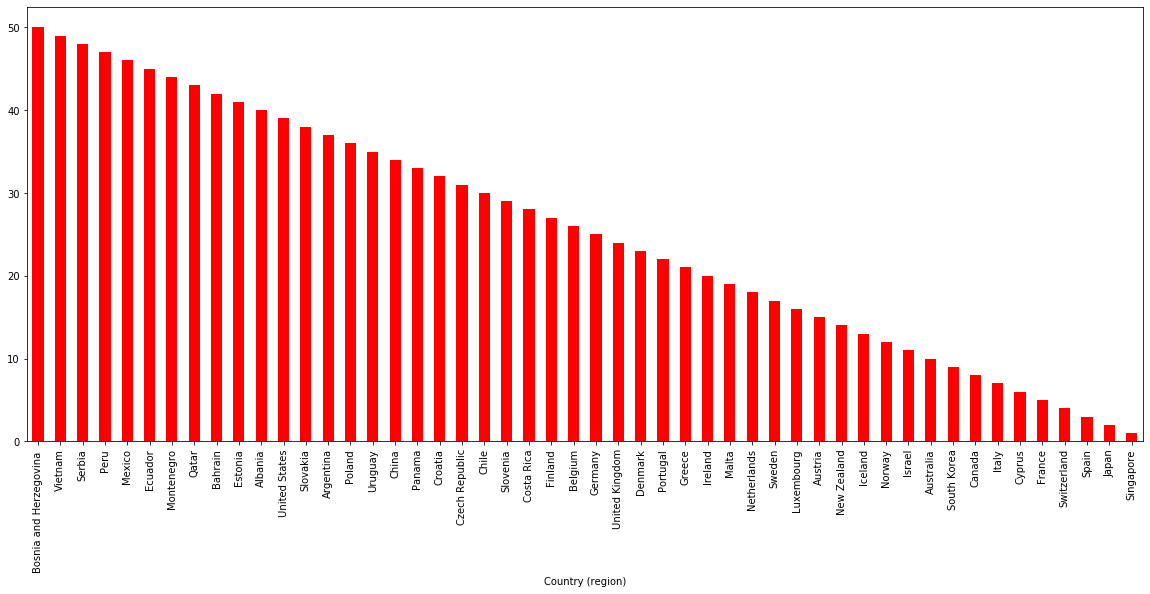

In [179]:
country_wise = df[['Country (region)', 'Healthy life\nexpectancy']].groupby('Country (region)').mean().sort_values('Healthy life\nexpectancy', ascending=False).tail(50)
country_wise.plot(kind = 'bar', legend=False,figsize=(20,8),color='red')
plt.show()

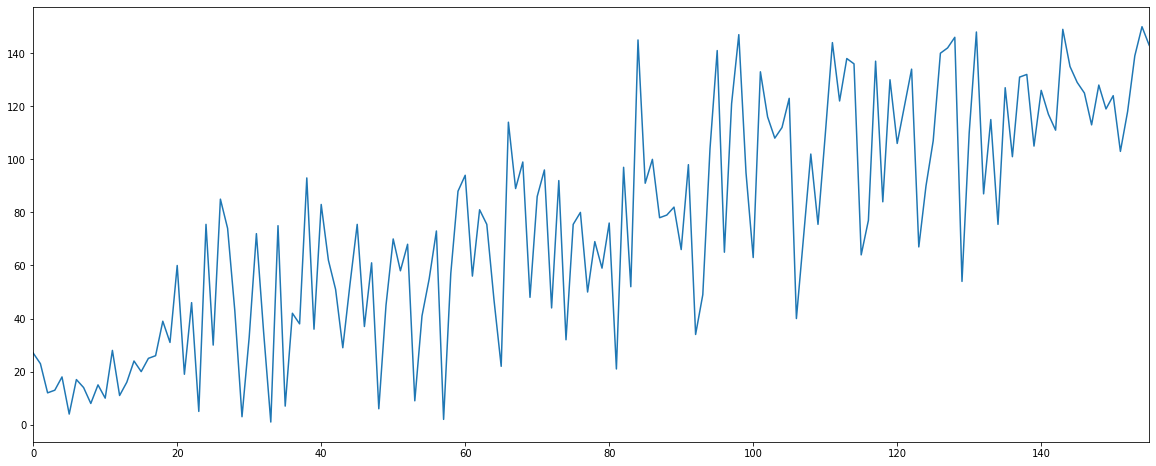

In [180]:
country_wise = df[['Country (region)', 'Healthy life\nexpectancy']]
country_wise.plot(kind = 'line', legend=False,figsize=(20,8))
plt.show()

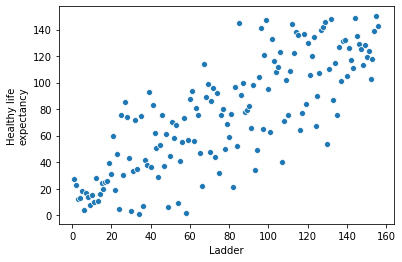

In [181]:
sns.scatterplot(x='Ladder',y='Healthy life\nexpectancy',data=df)

In [182]:
df=df.drop('Country (region)',axis=1)

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [240]:
X=df.iloc[:,:-1].values
y=df.iloc[:,:11].values

In [262]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [263]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [264]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [265]:
y_pred=regressor.predict(X_test)

Text(0, 0.5, 'Predicted y')

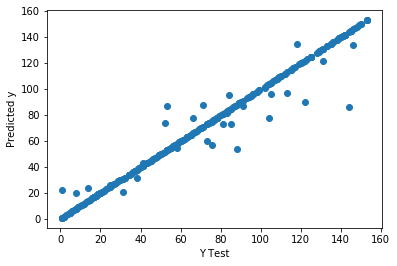

In [266]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted y')

In [267]:
# Evaluate the data
from sklearn import metrics
print("MAE", metrics.mean_absolute_error(y_test, y_pred))
print("MSE", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 1.3612989669497284
MSE 33.980029360167826
RMSE 5.829239175069747


In [268]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

0.9778145633725079